In [180]:
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.finance as finplt
import matplotlib.dates as pltdt
%matplotlib inline

In [181]:
os.getcwd()

'C:\\Apps\\Data\\Chipy'

In [237]:
#Start with a sample dataset - I'll change this to pull from github.
data = pd.read_csv('daily_price.csv',parse_dates = ['DATADATE'])
data.columns = ['ticker','datadate','currency','adj_factor','prc_open','prc_close','prc_high','prc_low','shrs']

### Let's use pandas to check out the data.

In [240]:
# Use df.head() to see the first 5 rows of the dataset
data.head()

,ticker,datadate,currency,adj_factor,prc_open,prc_close,prc_high,prc_low,shrs
0,ibm,1983-12-30,USD,4,NaN,122.000,123.375,122.000,421400
1,ibm,1984-01-03,USD,4,NaN,121.750,123.375,121.625,725000
2,ibm,1984-01-04,USD,4,NaN,123.875,124.000,121.750,1987000
3,ibm,1984-01-05,USD,4,NaN,124.250,125.000,122.625,1290900
4,ibm,1984-01-06,USD,4,NaN,123.500,124.500,123.000,945900


In [241]:
# Use df.tail() to see the last 5 rows of the dataset
data.tail()

,ticker,datadate,currency,adj_factor,prc_open,prc_close,prc_high,prc_low,shrs
48072,xom,2016-02-17,USD,1,81.65,82.00,82.775,81.160,17002770
48073,xom,2016-02-18,USD,1,82.90,82.45,83.060,81.860,14873480
48074,xom,2016-02-19,USD,1,82.19,82.50,82.550,80.910,13593300
48075,xom,2016-02-22,USD,1,83.21,82.39,83.440,82.200,14581260
48076,xom,2016-02-23,USD,1,81.99,81.23,82.370,80.879,11033090


In [248]:
#See a distinct list of the tickers

data['ticker'].unique()


['pg', 'tm', 'spx', 'xom', 'msft', 'ibm']

In [307]:
#Summarize the data by ticker

grouped = data.groupby('ticker')
grouped[['prc_close','prc_high','prc_low','prc_open']].describe()


prc_close     prc_high      prc_low     prc_open
ticker                                                          
ibm    count  8106.000000  8106.000000  8106.000000  2892.000000
       mean    117.858565   118.993185   116.721018   136.764522
       std      37.131387    37.307540    36.909299    42.290591
       min      41.000000    41.750000    40.625000    72.530000
       25%      92.632500    93.500000    91.800000    96.415000
       50%     112.500000   113.875000   111.250000   128.440000
       75%     133.750000   135.000000   132.625000   179.616250
       max     246.000000   246.000000   237.000000   215.380000
msft   count  7550.000000  7550.000000  7550.000000  2892.000000
       mean     59.345844    60.161322    58.472558    30.776960
       std      33.448498    33.940240    32.875698     7.900397
       min      15.150000    15.620000    14.870000    15.200000
       25%      28.500000    28.780000    28.220000    25.850000
       50%      52.500000    53.375000    51.640000    28.275000
       75%      84.625000    85.500000    83.250000    32.930000
       max     179.937500   180.375000   175.750000    56.470000
pg     count  8106.000000  8106.000000  8106.000000  2892.000000
       mean     74.578896    75.204408    73.855713    66.444682
       std      18.066061    18.249664    17.846202     9.876704
       min      44.180000    45.190000    39.370000    44.510000
       25%      61.032500    61.522500    60.440000    59.990000
       50%      72.465000    73.250000    71.625000    64.010000
       75%      85.250000    86.000000    84.421875    74.840000
       max     153.500000   155.125000   153.000000    93.500000
spx    count  8104.000000  8104.000000  8104.000000     0.000000
       mean    918.673678   923.364942   913.400922          NaN
       std     529.617817   533.200242   525.551293          NaN
       min     147.820000   147.820000   147.820000          NaN
       25%     402.915000   402.915000   402.915000          NaN
       50%     993.515000  1002.125000   983.705000          NaN
       75%    1305.050000  1312.942500  1295.012500          NaN
       max    2130.820000  2134.720000  2126.060000          NaN
tm     count  8105.000000  8104.000000  8105.000000  2892.000000
       mean     61.066903    61.424451    60.681029    97.318533
       std      34.011048    34.207021    33.788863    22.070656
       min       9.188000     9.250000     9.125000    57.390000
       25%      33.625000    33.750000    33.500000    77.640000
       50%      54.850000    55.065000    54.390000    94.045000
       75%      81.410000    81.871250    80.830000   117.500000
       max     145.320000   145.800000   144.950000   145.330000
xom    count  8106.000000  8106.000000  8106.000000  2892.000000
       mean     66.074222    66.653008    65.438067    77.455254
       std      17.838687    17.971290    17.690914    13.141955
       min      30.270000    31.250000    29.750000    45.240000
       25%      50.875000    51.250000    50.455000    67.387500
       50%      65.050000    65.594000    64.562750    79.035000
       75%      81.500000    82.404425    80.675000    87.822500
       max     109.375000   111.250000   106.875000   104.420000

In [309]:
#Pivot and put the tickers accross the top (Useful for building a correlation matrix)

data_pivot = data.pivot(index='datadate', columns='ticker', values='prc_close')
data_pivot.head()

ticker,ibm,msft,pg,spx,tm,xom
datadate,,,,,,
1983-12-30,122.000,NaN,56.875,164.93,12.813,37.375
1984-01-03,121.750,NaN,57.000,164.04,12.875,36.625
1984-01-04,123.875,NaN,56.875,166.78,12.938,37.125
1984-01-05,124.250,NaN,56.375,168.81,12.875,37.375
1984-01-06,123.500,NaN,54.875,169.28,12.813,37.375


## Get the data for Microsoft out of the frame

In [259]:
#Get just the data for msft from data

msft = data[data['ticker']=='msft']
msft.head()
#select * from data where ticker = 'msft'

,ticker,datadate,currency,adj_factor,prc_open,prc_close,prc_high,prc_low,shrs
8106,msft,1986-03-13,USD,288,NaN,28.00,29.25,25.5,3583000
8107,msft,1986-03-14,USD,288,NaN,29.00,29.50,28.0,1070000
8108,msft,1986-03-17,USD,288,NaN,29.50,29.75,29.0,462400
8109,msft,1986-03-18,USD,288,NaN,28.75,29.75,28.5,230800
8110,msft,1986-03-19,USD,288,NaN,28.25,29.00,28.0,166300


In [282]:
#Dropping the index isn't required, but it helps pandas freak out less when you start doing stuff

msft = data[data['ticker']=='msft'].reset_index(drop=True)
msft.head()

,ticker,datadate,currency,adj_factor,prc_open,prc_close,prc_high,prc_low,shrs
0,msft,1986-03-13,USD,288,NaN,28.00,29.25,25.5,3583000
1,msft,1986-03-14,USD,288,NaN,29.00,29.50,28.0,1070000
2,msft,1986-03-17,USD,288,NaN,29.50,29.75,29.0,462400
3,msft,1986-03-18,USD,288,NaN,28.75,29.75,28.5,230800
4,msft,1986-03-19,USD,288,NaN,28.25,29.00,28.0,166300


In [ ]:
# Do a quick check on the data

In [283]:
#Adjust the data for splits 
msft['open'] = msft['prc_open']/msft['adj_factor']
msft['close'] = msft['prc_close']/msft['adj_factor']
msft['high'] = msft['prc_high']/msft['adj_factor']
msft['low'] = msft['prc_low']/msft['adj_factor']

In [284]:
# Take a look at the data types
msft.dtypes

ticker                object
datadate      datetime64[ns]
currency              object
adj_factor           float64
prc_open             float64
prc_close            float64
prc_high             float64
prc_low              float64
shrs                 float64
open                 float64
close                float64
high                 float64
low                  float64
dtype: object

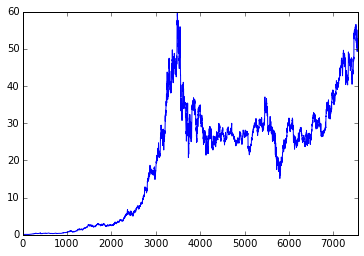

In [285]:
# Let's take a look at the data 
# This will plot out the Daily, split adjusted price, for MSFT.
msft['close'].plot();

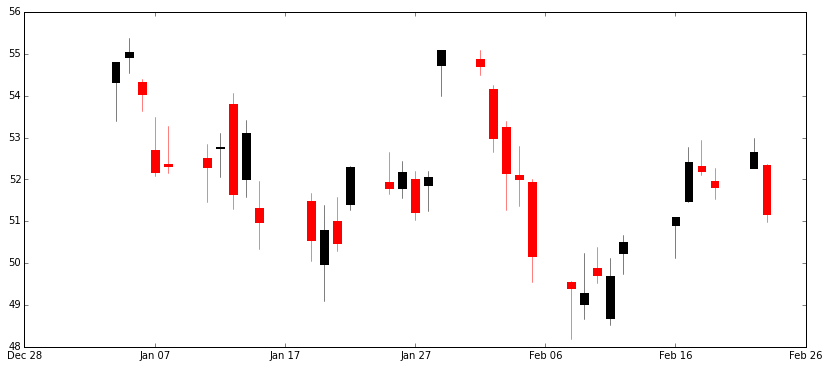

In [286]:
#That's cool, but can I have a more "finance-y" chart?

formatter = pltdt.DateFormatter('%b %d')

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)

ax.xaxis.set_major_formatter(formatter)

plotdata = msft[msft['datadate'] >= '2016-01-01'][['datadate', 'open', 'close', 'high', 'low']]
# Convert the datetime column - needed for matplotlib
plotdata.datadate = pltdt.date2num(plotdata.datadate.dt.to_pydatetime())

#Translate the pandas dataframe into a tuple for the plot
plot_tuple = [tuple(x) for x in plotdata.to_records(index=False)]

finplt.candlestick_ochl(ax,plot_tuple,width=0.6);

#Moving Averages
Moving averages can be useful to find some of the points where the price has reversed direction indicating a buy or sell signal.

Start with a simple example.  Buy when the shorter window average moves above a longer window average. Sell (or close the trade) when it drops back below.

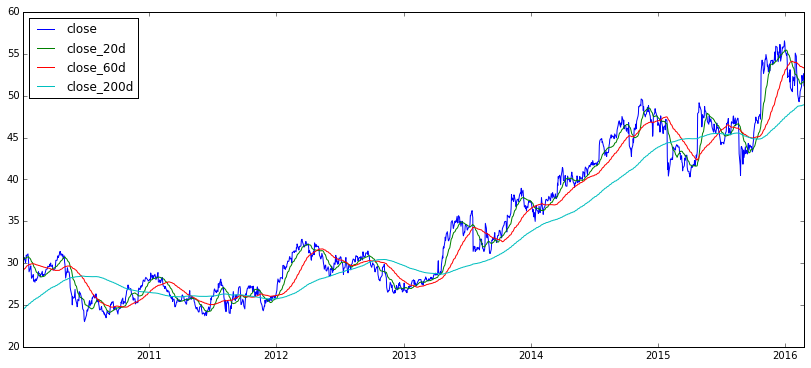

In [298]:
#Add the 20 day, 60 day and 200 day moving average.
msft['close_20d'] = pd.rolling_mean(msft['close'],20)
msft['close_60d'] = pd.rolling_mean(msft['close'],60)
msft['close_200d'] = pd.rolling_mean(msft['close'],200)

plotdata = msft[msft['datadate'] >= '2010-01-01']

#Plot
avg_fig = plt.figure(figsize=(14,6))
plt.plot(plotdata['datadate'],plotdata[['close','close_20d','close_60d','close_200d']])
plt.legend(['close','close_20d','close_60d','close_200d'],loc=2)
plt.show()


### Moving Average Strategies

Some of the opportunities here are fairly clear. There is a fairly clear buy signal at around mid 2013 and a fairly clear sell signal at early 2015. There are others, but it is less clear that they represent a definative buy sell points.

Multiple bands can be included to add conviction to the buy/sell decision. (If three is good - why not 12?)

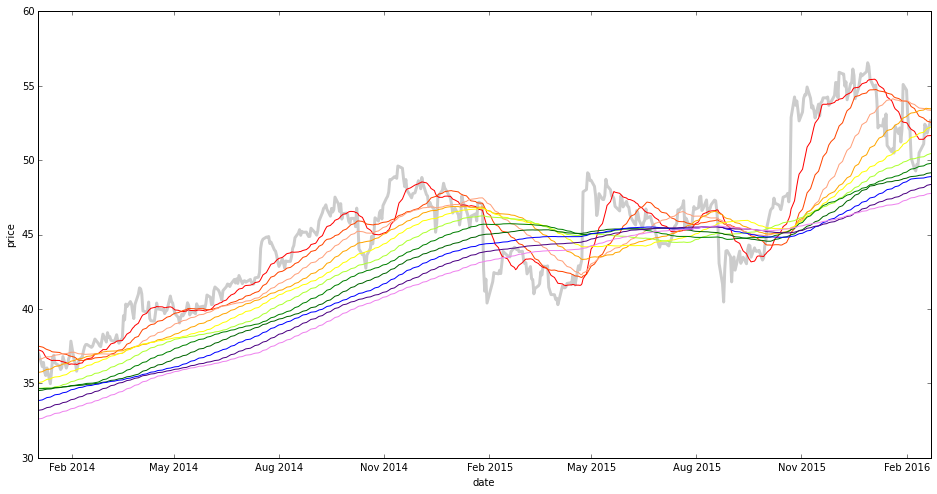

In [221]:
msft['close_5d'] = pd.rolling_mean(msft['close'],5)       #darkred
msft['close_20d'] = pd.rolling_mean(msft['close'],20)     #red
msft['close_40d'] = pd.rolling_mean(msft['close'],40)     #orangered
msft['close_60d'] = pd.rolling_mean(msft['close'],60)     #lightsalmon
msft['close_80d'] = pd.rolling_mean(msft['close'],80)     #orange
msft['close_100d'] = pd.rolling_mean(msft['close'],100)   #yellow
msft['close_125d'] = pd.rolling_mean(msft['close'],125)   #greenyellow
msft['close_150d'] = pd.rolling_mean(msft['close'],150)   #green
msft['close_175d'] = pd.rolling_mean(msft['close'],175)   #darkgreen
msft['close_200d'] = pd.rolling_mean(msft['close'],200)   #blue
msft['close_225d'] = pd.rolling_mean(msft['close'],225)   #indigo 
msft['close_250d'] = pd.rolling_mean(msft['close'],250)   #violet

plot_data = msft[msft['datadate'] >= '2014-01-01']

rainbow_fig, ax1 = plt.subplots(figsize=(16,8))
ax1.plot(plot_data['datadate'],plot_data['close'],'k-',lw=3,alpha=.2)
ax1.set_xlabel('date',color='k')
ax1.set_ylabel('price', color='k')

#ax1.plot(plot_data['datadate'],plot_data['close_5d'],'darkred')
ax1.plot(plot_data['datadate'],plot_data['close_20d'],'red')
ax1.plot(plot_data['datadate'],plot_data['close_40d'],'orangered')
ax1.plot(plot_data['datadate'],plot_data['close_60d'],'lightsalmon')
ax1.plot(plot_data['datadate'],plot_data['close_80d'],'orange')
ax1.plot(plot_data['datadate'],plot_data['close_100d'],'yellow')
ax1.plot(plot_data['datadate'],plot_data['close_125d'],'greenyellow')
ax1.plot(plot_data['datadate'],plot_data['close_150d'],'green')
ax1.plot(plot_data['datadate'],plot_data['close_175d'],'darkgreen')
ax1.plot(plot_data['datadate'],plot_data['close_200d'],'blue')
ax1.plot(plot_data['datadate'],plot_data['close_225d'],'indigo')
ax1.plot(plot_data['datadate'],plot_data['close_250d'],'violet')
plt.show()


##Deficiencies in moving average strategies - leading to the MACD

Can you make money trading moving averages - sure. Can you beat the market? It's tough.
1. Moving averages are inefficient, buying after the rally has started and selling after it has ended.
2. It's hard to scale because you might not be able to put it on for several days, not every stock is a good candidate for a moving average strategy.

The MACD (Moving Average Convergence/Divergence) seeks to improve the efficiency of a moving average strategy by timing the buy (sell) to the convergence (divergence) of the moving average streams instead of the explicit cross over.

How to calculate:


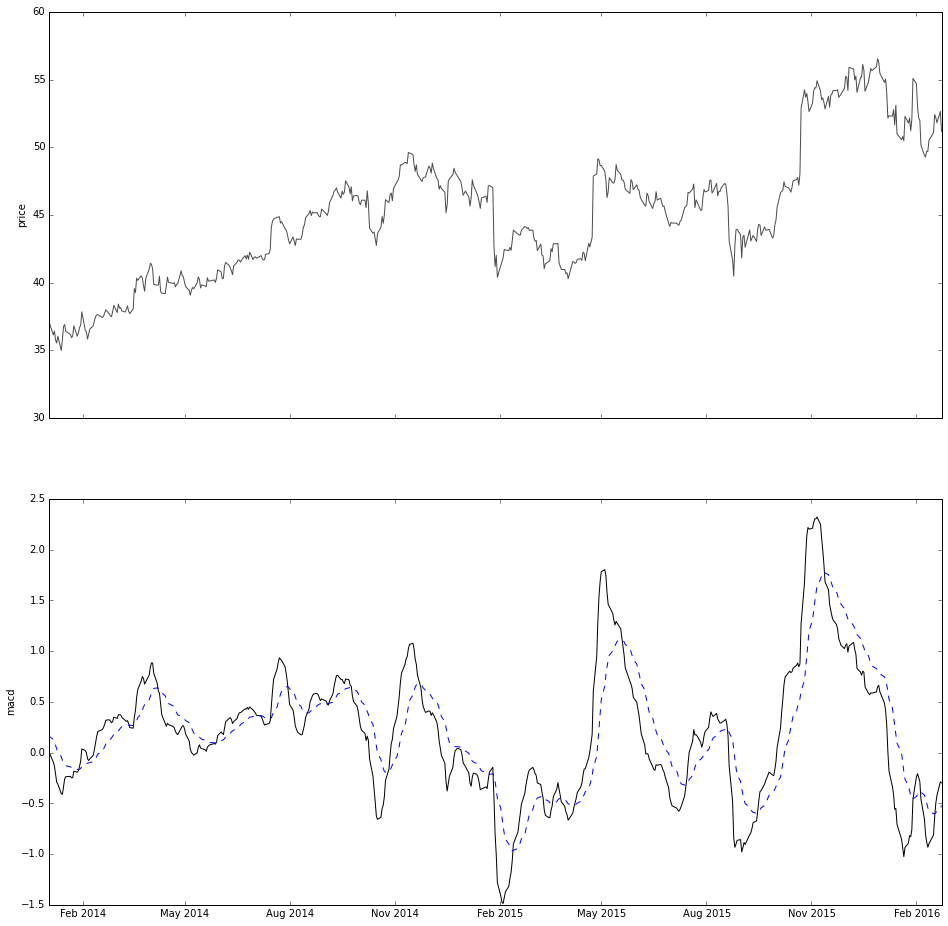

In [299]:
#Calculate as standard 9-12-26 MACD.
msft['close_12ema'] = pd.ewma(msft['close'],span=12) 
msft['close_26ema'] = pd.ewma(msft['close'],span=26) 
msft['close_macd'] = msft['close_12ema']-msft['close_26ema']
msft['macd_9ema'] = pd.ewma(msft['close_macd'],9)


plot_data = msft[msft['datadate'] >= '2014-01-01']

macd_fig, ax = plt.subplots(2, sharex=True,figsize=(16,16))
ax[0].plot(plot_data['datadate'],plot_data['close'],'k-',alpha=.7)
ax[0].set_ylabel('price', color='k')

ax[1].plot(plot_data['datadate'],plot_data['close_macd'],'k-')
ax[1].plot(plot_data['datadate'],plot_data['macd_9ema'],'b--')
ax[1].set_ylabel('macd', color='k')
plt.show()

#Add legend

##Where should I go from here?

1. Code some other technical indicators
        *Take a look at RSI, or MASS Index, or Tom's Momentum/Acceleration
2. Add some trade analysis - the start of a backtest
        *Determine when you would buy and sell and tally up your returns
3. Explore talib
4. Put this into quantopian and backtest it
        *Quantopian has a lot of stuff built in to test these types of strategies:
        *https://www.quantopian.com/help#talib-examples
        *https://www.quantopian.com/help#api-talib
5. Research multiple indicators as factors = Machine learn a strategy
